# Importation des données

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

tab_final = pd.read_csv("/Users/louise/Documents/GitHub/projetpython/1. Rassemblement des données/tab_final.csv", ";")
tab_final

,nom,% Voix/Ins_T2,% Voix/Exp_T2,% Voix/Exp_T1,% Voix/Ins_T1,P13_pop,P13_pop0002,P13_pop0305,P13_pop0610,P13_pop1117,...,_AE,_GDR,_LFI,_LR,_LREM,_LT,_MODEM,_NI,_SOC,_UDI
0,Xavier Breton,21.25,53.75,26.78,12.93,115682.800721,2.484397,3.828599,6.533428,9.086115,...,0,0,0,1,0,0,0,0,0,0
1,Olga Givernet,21.91,61.86,45.30,20.37,131843.000000,2.904212,4.470469,7.318553,9.396024,...,0,0,0,0,1,0,0,0,0,0
2,Stéphane Trompille,25.21,64.50,36.00,17.33,126379.199279,2.446609,3.752997,6.853987,9.922535,...,0,0,0,0,1,0,0,0,0,0
3,Damien Abad,25.74,67.02,35.00,16.91,115832.000000,2.676290,4.108537,7.059362,9.157228,...,0,0,0,1,0,0,0,0,0,0
4,Aude Bono-Vandorme,23.06,56.22,28.79,13.88,105282.000000,2.629154,3.841149,6.741007,9.092809,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,David Corceiro,19.86,57.11,1.10,0.49,117824.000000,2.827971,4.130772,6.643864,8.886211,...,0,0,0,0,0,0,1,0,0,0
519,Dominique Da Silva,18.40,53.88,NaN,NaN,116638.876433,3.044462,4.439377,7.726470,10.200792,...,0,0,0,0,1,0,0,0,0,0
520,François Pupponi,18.79,65.80,0.00,0.00,111720.123567,3.537415,5.429646,8.368242,10.725027,...,0,0,0,0,0,0,1,0,0,0
521,Zivka Park,13.99,51.67,0.00,0.00,114899.000000,3.045283,4.495252,7.745933,10.407401,...,0,0,0,0,1,0,0,0,0,0


# Création des barplots

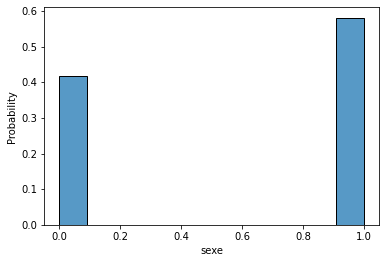

In [2]:
sexe_depute = sns.histplot(data = tab_final, x = "sexe", stat= "probability")

ValueError: shape mismatch: objects cannot be broadcast to a single shape

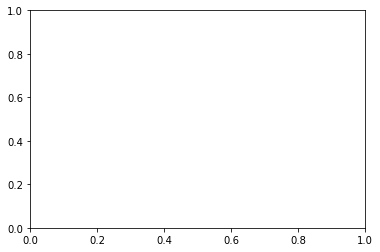

In [4]:
sexe = tab_final['sexe']
sum
x = [0,1]
tot = sum(sexe)
sexe=sexe/tot
width = 0.8 
fig, ax = plt.subplots()
rects1 = ax.bar(x, sexe, width, color='b')
ax.set_ylim(0,0.3)
ax.set_ylabel('Proportions')
ax.set_title('Sexe des député.es')
ax.set_xticks(np.add(x,(width/2))) # set the position of the x ticks
plt.show()

In [ ]:
ancrage_local_depute = sns.histplot(data = tab_final, x = "ancrage_local", stat='probability')

In [ ]:
age_depute = sns.histplot(data = tab_final, x = "age", stat='probability', bins = 10 )

In [ ]:
nb_mandats_depute = sns.histplot(data = tab_final, x = 'nb_mandats', stat='probability')

In [ ]:
names = [ '_AE', '_GDR', '_LFI', '_LR', '_LREM', '_LT', '_MODEM', '_NI', '_SOC', '_UDI']
values=[]  
for i in names : 
    values.append(tab_final[i].sum()/523*100)
sum(values) #test
plt.bar(names, values)
plt.show()

In [ ]:
names = ['_Agriculteurs exploitants', '_Anciens agriculteurs exploitants', "_Anciens artisans, commerçants, chefs d'entreprise", '_Anciens cadres et professions intermédiaires', '_Anciens employés et ouvriers',
 '_Artisans', "_Cadres d'entreprise", '_Cadres de la fonction publique, professions intellectuelles et  artistiques',
 "_Chefs d'entreprise de 10 salariés ou plus", '_Commerçants et assimilés', '_Contremaîtres, agents de maîtrise', "_Employés administratifs d'entreprise", '_Employés de commerce', 
 '_Employés de la fonction publique', '_Inactifs divers (autres que retraités)', '_Ouvriers agricoles',
 '_Ouvriers qualifiés', '_Professions intermédiaires administratives et commerciales des entreprises', "_Professions intermédiaires de l'enseignement, de la santé, de la fonction publique et assimilés", '_Professions libérales et assimilés',
 '_Sans profession déclarée']
values=[]  
for i in names : 
    values.append(tab_final[i].sum())
sum(values) #test il manque 6 personnes on n'a que 517 résultats 
tab_final[names].sum(axis=1).to_list() #on peut voir que cela vaut zéro parfois
#tab_final['_Sans profession déclarée'] == 1 if tab_final[names].sum(axis=1) = 0 marche pas pour modifier


In [ ]:
tab_final.columns.to_list()

# Création des pairplots et heatmap

In [6]:
data_petit = tab_final.drop('nom', 1)
df = data_petit.corr()
sns.heatmap(data_petit.corr(), cmap='coolwarm', annot=True, fmt=".2f") #Permet de faire un premier tri dans les variables corrélées

In [7]:
data_plus_petit = data_petit.drop(columns= ['C13_H15P', 'C13_H15P_cs1', 'C13_H15P_cs2',
 'C13_H15P_cs3', 'C13_H15P_cs4', 'C13_H15P_cs5',
 'C13_H15P_cs6', 'C13_H15P_cs7', 'C13_H15P_cs8',
 'C13_F15P', 'C13_F15P_cs1', 'C13_F15P_cs2',
 'C13_F15P_cs3', 'C13_F15P_cs4', 'C13_F15P_cs5',
 'C13_F15P_cs6', 'C13_F15P_cs7', 'C13_F15P_cs8','P13_poph',
 'P13_h0019', 'P13_h2064', 'P13_h65p', 'P13_popf',
 'P13_f0019', 'P13_f2064', 'P13_f65p'])

In [11]:
#df2 = data_plus_petit.corr()
df2

,% Voix/Ins_T2,% Voix/Exp_T2,% Voix/Exp_T1,% Voix/Ins_T1,P13_pop,P13_pop0002,P13_pop0305,P13_pop0610,P13_pop1117,P13_pop1824,...,_AE,_GDR,_LFI,_LR,_LREM,_LT,_MODEM,_NI,_SOC,_UDI
% Voix/Ins_T2,1.000000,0.586959,0.297164,0.354555,-0.148710,-0.350876,-0.335136,-0.243657,-0.122403,-0.146248,...,-0.078371,-0.054310,-0.174456,-0.051840,0.069734,0.163707,-0.026248,0.016297,0.019795,0.074345
% Voix/Exp_T2,0.586959,1.000000,0.202980,0.208724,0.032291,0.022440,0.032419,0.037117,0.066597,0.039035,...,-0.013222,0.025752,-0.101964,-0.167664,0.147835,0.039399,0.008680,-0.046903,-0.012933,0.061941
% Voix/Exp_T1,0.297164,0.202980,1.000000,0.990843,-0.102046,-0.318426,-0.235202,-0.134762,-0.007272,-0.109164,...,-0.044675,-0.079438,-0.105929,-0.041409,0.156723,0.035023,-0.012704,-0.092670,-0.040272,0.007125
% Voix/Ins_T1,0.354555,0.208724,0.990843,1.000000,-0.110912,-0.350958,-0.266207,-0.155152,-0.019990,-0.118009,...,-0.058994,-0.086395,-0.116833,-0.053758,0.166814,0.040819,-0.002818,-0.093953,-0.037205,0.014159
P13_pop,-0.148710,0.032291,-0.102046,-0.110912,1.000000,0.300550,0.281629,0.210993,0.120433,0.186387,...,0.052785,0.056031,0.019734,-0.153427,0.151217,-0.056763,0.055503,-0.027855,-0.083075,-0.136553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
_LT,0.163707,0.039399,0.035023,0.040819,-0.056763,-0.107649,-0.085003,-0.072744,-0.029416,-0.061433,...,-0.033070,-0.024309,-0.029462,-0.078135,-0.161774,1.000000,-0.055106,-0.033070,-0.037933,-0.027505
_MODEM,-0.026248,0.008680,-0.012704,-0.002818,0.055503,-0.063351,-0.029161,-0.012690,-0.003686,-0.023559,...,-0.066256,-0.048703,-0.059027,-0.156542,-0.324111,-0.055106,1.000000,-0.066256,-0.075998,-0.055106
_NI,0.016297,-0.046903,-0.092670,-0.093953,-0.027855,0.040677,0.051989,0.058574,0.064322,0.036586,...,-0.039761,-0.029228,-0.035423,-0.093944,-0.194506,-0.033070,-0.066256,1.000000,-0.045608,-0.033070
_SOC,0.019795,-0.012933,-0.040272,-0.037205,-0.083075,-0.007701,0.017461,0.042604,0.055710,-0.059965,...,-0.045608,-0.033525,-0.040632,-0.107758,-0.223106,-0.037933,-0.075998,-0.045608,1.000000,-0.037933


<AxesSubplot:>

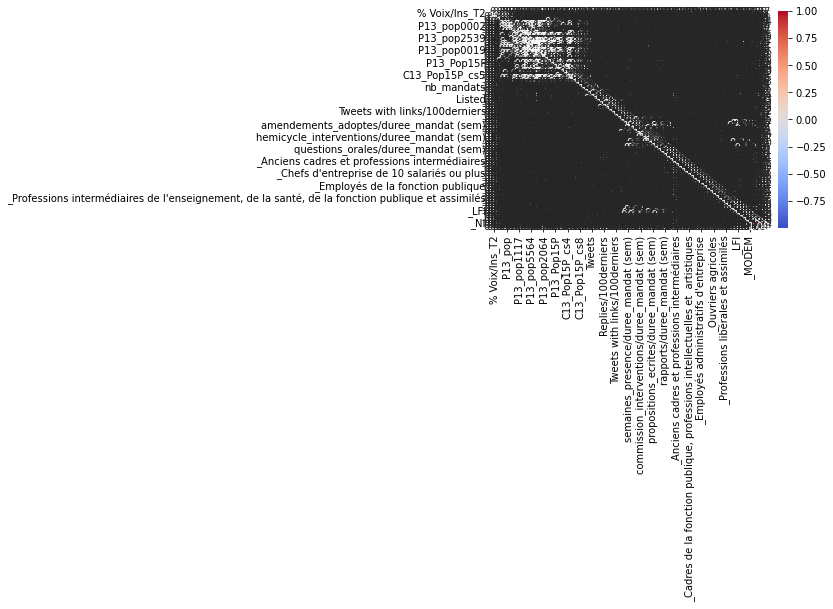

In [9]:
sns.heatmap(data_plus_petit.corr(), cmap='coolwarm', annot=True, fmt=".2f")